In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
arch = wrn
sz=320
bs = 32
path='data/hackerearth-myntra'

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

In [6]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 1325/1709 [00:15<00:04, 87.32it/s, loss=5.71]

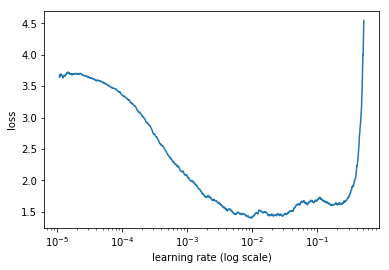

In [7]:
learn.sched.plot()

In [8]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 10%|█         | 177/1709 [00:04<00:39, 38.49it/s, loss=2.19]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.393527   1.188077   0.662456  
    1      1.254604   1.10292    0.681805                      
    2      1.193319   1.06527    0.689544                      
    3      1.1227     1.041026   0.694947                      
    4      1.096621   1.020067   0.7013                        



[1.0200666, 0.70129964953271029]

In [9]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.091055   1.002973   0.702979  
    1      1.066758   0.986117   0.70736                       
    2      1.002426   0.972195   0.712252                       
    3      0.986972   0.963938   0.714442                       
    4      1.01282    0.952871   0.718969                      



[0.95287144, 0.71896904205607481]

In [10]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.970054   0.944783   0.722693  
    1      0.968336   0.941506   0.722766                       
    2      0.970044   0.933337   0.723204                       
    3      0.982957   0.927028   0.726855                       
    4      0.950874   0.925302   0.726855                       



[0.92530167, 0.72685455607476634]

In [11]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      1.050422   0.955917   0.714515  
    1      0.97877    0.95002    0.71342                        
    2      0.976885   0.937036   0.719699                      
    3      0.927923   0.930785   0.722401                       
    4      0.922885   0.918034   0.726782                       



[0.91803408, 0.72678154205607481]

In [12]:
learn.fit(0.01,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.976623   0.94026    0.719772  
    1      0.940764   0.935153   0.721159                       



[0.93515342, 0.7211594626168224]

In [13]:
learn.fit(0.001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.821178   0.902518   0.732112  
    1      0.787643   0.896074   0.734156                      
    2      0.805664   0.892297   0.73547                        
    3      0.800618   0.894466   0.736638                       



[0.89446634, 0.73663843457943923]

In [14]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [15]:
log_preds,y = learn.TTA()


In [16]:
probs = np.mean(np.exp(log_preds),0)

In [17]:
accuracy_np(probs, y)

0.73683055311676915

In [18]:
y[10]=9

In [19]:
predictions = np.argmax(probs,axis=1)

In [20]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  96    3    1    1    3   11   27   45  107    0    4    0   21    0    0   37    1    0   19    4    3
     1   70    0]
 [   1   57    0    0    0    1    0    0   22    0    1    0    3    0    0    1    0    0    0    1    0
     0   37    0]
 [   7    0   16    0    3    1    2    1    6    0    0    0    0    0    0    4    0    0    0    0    0
     0    5    0]
 [   1    0    0   25    0    0    0    4    0    0    0    0    0    0    0    9    0    0    7    0    0
     0    0    0]
 [   2    0    0    0  276    1    0    2    5    0    2    0    0    0    0  169    0    0   35    0    1
     0   20    0]
 [  12    0    0    0    1  120   15   24   36    0    6    0    1    0    0   14    1    0    1    2    0
     0   39    0]
 [  14    0    0    0    1   13  176    5   38    0    0    0    3    0    0   19    0    0    2    0    0
     0   36    0]
 [  24    0    1    1    7   16   11  184   21    0    3    0    0    0    0   74    

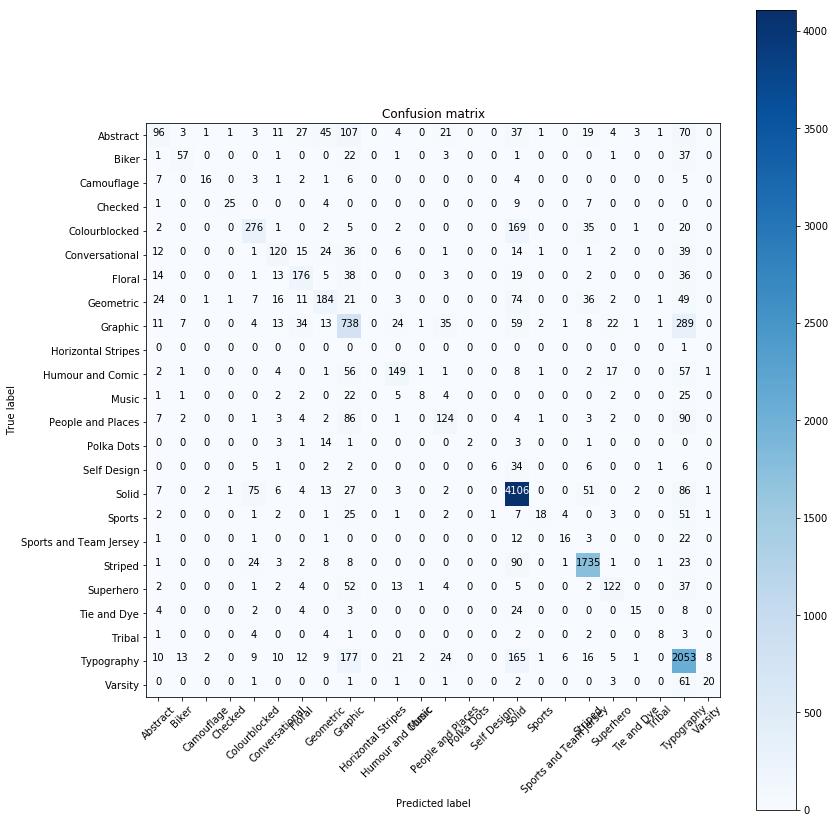

In [21]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.21145  0.00661  0.0022   0.0022   0.00661  0.02423  0.05947  0.09912  0.23568  0.       0.00881  0.
   0.04626  0.       0.       0.0815   0.0022   0.       0.04185  0.00881  0.00661  0.0022   0.15419  0.     ]
 [ 0.00806  0.45968  0.       0.       0.       0.00806  0.       0.       0.17742  0.       0.00806  0.
   0.02419  0.       0.       0.00806  0.       0.       0.       0.00806  0.       0.       0.29839  0.     ]
 [ 0.15556  0.       0.35556  0.       0.06667  0.02222  0.04444  0.02222  0.13333  0.       0.       0.       0.
   0.       0.       0.08889  0.       0.       0.       0.       0.       0.       0.11111  0.     ]
 [ 0.02174  0.       0.       0.54348  0.       0.       0.       0.08696  0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.15217  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.       0.       0.       0.53801  0.00195  0.       0.0039   0.00975  0.       0.0039   0.    

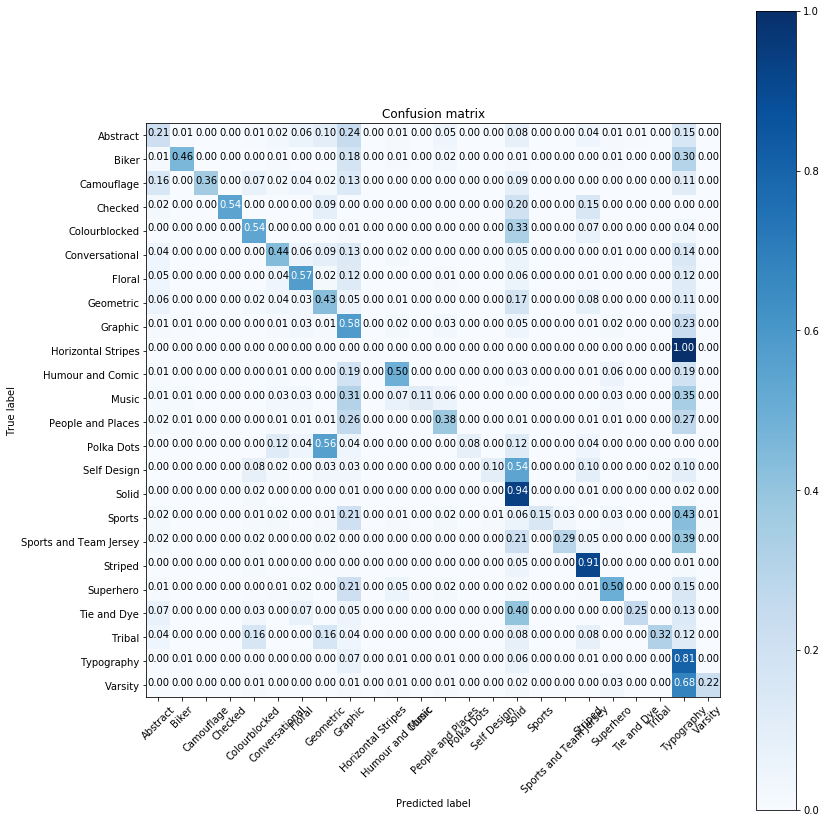

In [22]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.2 -> must overfit a bit 

In [23]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [24]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 1381/1709 [00:14<00:03, 92.21it/s, loss=5.42]

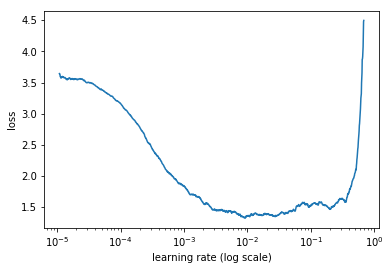

In [25]:
learn.sched.plot()

In [26]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 12%|█▏        | 198/1709 [00:04<00:36, 41.66it/s, loss=1.4] 

Exception in thread Thread-38:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.087449   1.017541   0.699839  
    1      1.024483   0.974333   0.710207                      
    2      0.946385   0.952323   0.718604                      
    3      0.884781   0.930086   0.725905                       
    4      0.864244   0.919555   0.731746                      



[0.91955507, 0.73174649532710279]

In [27]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.776985   0.927079   0.729045  
    1      0.785604   0.930249   0.731016                       



[0.93024921, 0.73101635514018692]

In [28]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.696891   0.93185    0.732112  
    1      0.719587   0.933925   0.731381                       



[0.93392503, 0.73138142523364491]

In [29]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.564242   0.919255   0.737661  
    1      0.592071   0.903906   0.740289                       
    2      0.542114   0.898454   0.743721                       
    3      0.588788   0.903275   0.740508                      
    4      0.571763   0.904348   0.742041                       



[0.90434843, 0.74204147196261683]

In [30]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.525728   0.896556   0.744378  
    1      0.542206   0.894159   0.747006                       



[0.89415938, 0.74700642523364491]

In [31]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.51278    0.910937   0.745108  
    1      0.542322   0.905814   0.745984                       



[0.90581381, 0.74598422897196259]

In [32]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.509733   0.908936   0.745546  
    1      0.486407   0.907151   0.746714                       



[0.90715086, 0.74671436915887845]

In [33]:
log_preds,y = learn.TTA()


In [34]:
probs = np.mean(np.exp(log_preds),0)

In [35]:
accuracy_np(probs, y)

0.74648814749780512

In [36]:
y[10]=9

In [37]:
predictions = np.argmax(probs,axis=1)

In [38]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[ 128    4    3    0    5   11   27   26   73    0    6    3   22    0    3   35    2    0   11    7    3
     2   83    0]
 [   0   62    0    0    0    2    0    1   14    0    1    0    5    0    0    2    1    0    0    0    0
     0   36    0]
 [   7    0   22    0    2    0    1    0    6    0    1    0    0    0    0    2    0    0    0    0    0
     0    4    0]
 [   1    0    0   27    0    0    0    4    0    0    0    0    0    0    0    9    0    0    5    0    0
     0    0    0]
 [   3    0    0    1  289    1    0    2    5    0    1    0    1    0    1  163    0    0   28    1    1
     0   16    0]
 [  12    0    0    0    2  124   12   22   29    0   10    0    1    0    0   11    1    0    2    3    0
     0   43    0]
 [  13    0    0    0    1   10  196    4   22    0    0    0    3    0    0   19    0    0    2    2    0
     0   35    0]
 [  26    0    2    1    9   19    7  202   20    0    0    0    1    3    1   61    

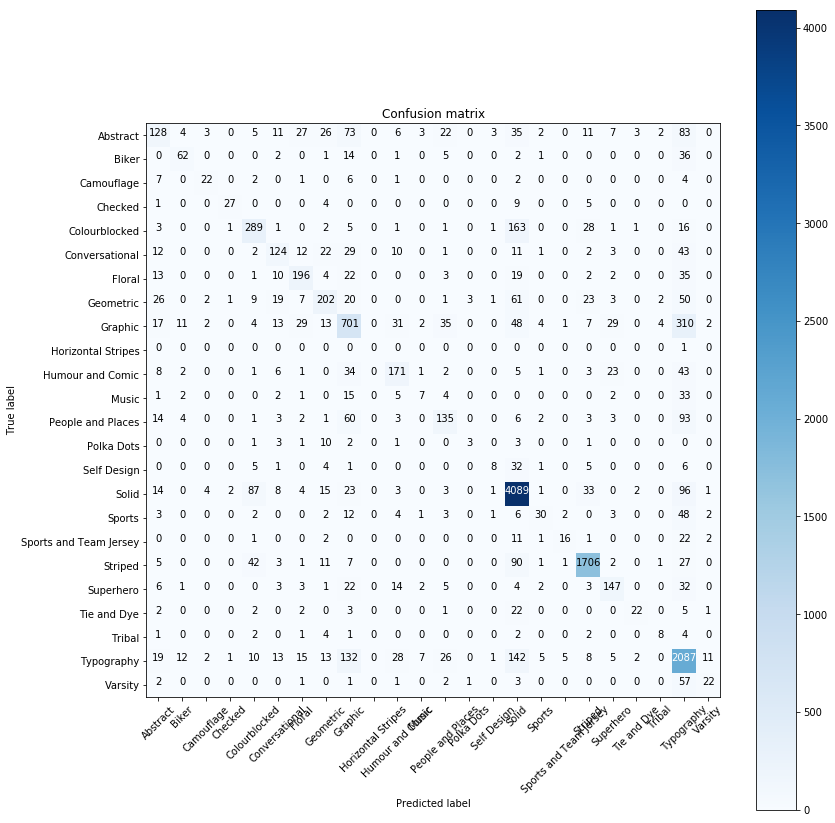

In [39]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.28194  0.00881  0.00661  0.       0.01101  0.02423  0.05947  0.05727  0.16079  0.       0.01322  0.00661
   0.04846  0.       0.00661  0.07709  0.00441  0.       0.02423  0.01542  0.00661  0.00441  0.18282  0.     ]
 [ 0.       0.5      0.       0.       0.       0.01613  0.       0.00806  0.1129   0.       0.00806  0.
   0.04032  0.       0.       0.01613  0.00806  0.       0.       0.       0.       0.       0.29032  0.     ]
 [ 0.15556  0.       0.48889  0.       0.04444  0.       0.02222  0.       0.13333  0.       0.02222  0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.       0.       0.08889  0.     ]
 [ 0.02174  0.       0.       0.58696  0.       0.       0.       0.08696  0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.1087   0.       0.       0.       0.       0.     ]
 [ 0.00585  0.       0.       0.00195  0.56335  0.00195  0.       0.0039   0.00975  0.       0.00195  0

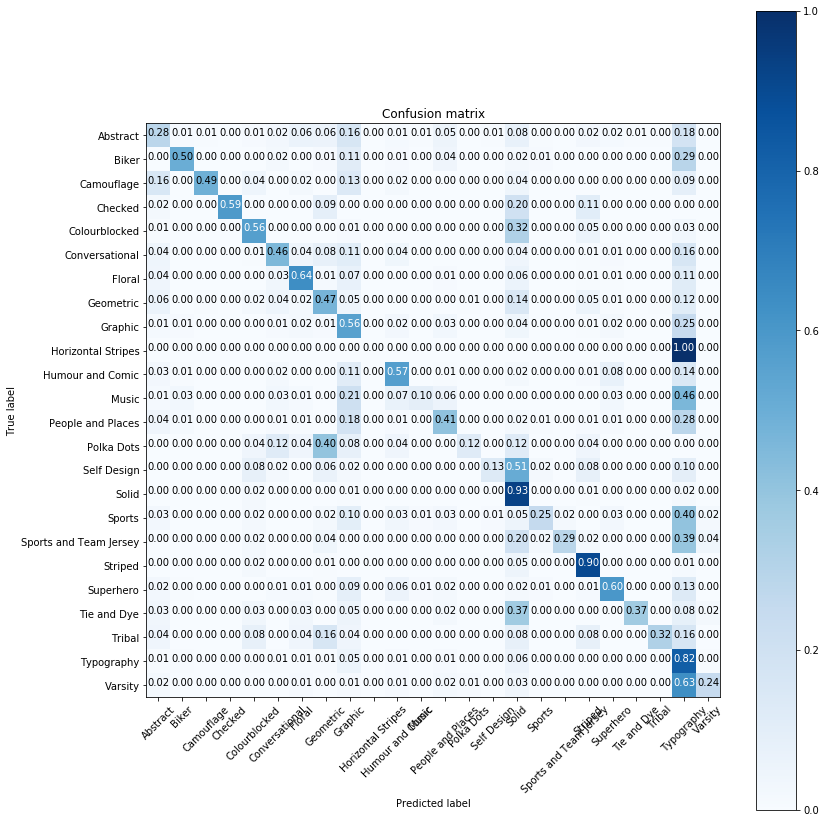

In [40]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

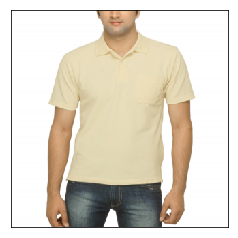

In [41]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))
show_img(data.val_ds.denorm(to_np(x))[0]);

## Next -> InceptionV4 -> Choose WRN @ 0.2 PS